# Model Selection

Now that we've successfully pre-processed the data, we can move to building ML models.

We will use the following models (building multiple models for each with different input variables and parameters):
- Logistic Regression
- Decision Tree
- Random Forest
- k-Nearest Neighbor
- Support Vector Machine (SVM)
- Naive Bayes
- **Neural Network**
- Linear Perceptron
- Gradient Boosting Machines

### Neural Network

We will create different Neural Network models based on the following parameters:
- Different dataset combinations:
    - Numeric
    - Binary
    - Categorical
    - Numeric + Binary
    - Numeric + Categorical
    - Binary + Categorical
    - Numeric + Binary + Categorical
- Number of Hidden Layers:
    - 0
    - 1
    - 2
    - 3
- Number of Dropout Layers:
    - 0
    - 1
- Number of Nodes per Hidden Layer:
    - 8
    - 16
    - 32
    
We will evaluate these models based on:
- 2x2 Confusion Matrix
- Precision, Recall, F-1 Score
- ROC Curve
- Precision-Recall Curve
- Log-Loss

Note: We will not use a simple accuracy score due to our dataset being dominated by roughly 90% of non-default data

#### Different Datasets

To start, we will examine the performance of the different datasets using these basic parameters:
- layers = {16, 8, 1}
- epochs = 25

From here, we can then pick the ones that work the best before optimizing the additional parameters (this saves us time and notebook space).

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import (confusion_matrix, 
                             classification_report,
                             precision_recall_curve,
                             average_precision_score,
                             roc_curve,
                             roc_auc_score,
                             log_loss)

2025-05-06 16:19:38.788395: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df_auto_loan_numeric_norm = pd.read_csv('df_auto_loan_numeric_norm.csv').set_index('ID')
df_auto_loan_binary = pd.read_csv('df_auto_loan_binary.csv').set_index('ID')
df_auto_loan_categorical = pd.read_csv('df_auto_loan_categorical.csv').set_index('ID')
df_auto_loan_numeric_binary_norm = pd.read_csv('df_auto_loan_numeric_binary_norm.csv').set_index('ID')
df_auto_loan_numeric_categorical_norm = pd.read_csv('df_auto_loan_numeric_categorical_norm.csv').set_index('ID')
df_auto_loan_binary_categorical = pd.read_csv('df_auto_loan_binary_categorical.csv').set_index('ID')
df_auto_loan_numeric_binary_categorical_norm = pd.read_csv('df_auto_loan_numeric_binary_categorical_norm.csv').set_index('ID')


In [4]:
df_dict = {'Numeric': df_auto_loan_numeric_norm, 
           'Binary': df_auto_loan_binary,
           'Categorical': df_auto_loan_categorical,
           'Numeric + Binary': df_auto_loan_numeric_binary_norm,
           'Numeric + Categorical': df_auto_loan_numeric_categorical_norm,
           'Binary + Categorical': df_auto_loan_binary_categorical,
           'Numeric + Binary + Categorical': df_auto_loan_numeric_binary_categorical_norm}

Numeric
Epoch 1/25


/Users/suhaib/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.3602 - precision: 0.0959 - recall: 0.6733 - val_loss: 0.7423 - val_precision: 0.1025 - val_recall: 0.8325
Epoch 2/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.1995 - precision: 0.1008 - recall: 0.7188 - val_loss: 0.6142 - val_precision: 0.1198 - val_recall: 0.3752
Epoch 3/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.3504 - precision: 0.1031 - recall: 0.6637 - val_loss: 0.6958 - val_precision: 0.1103 - val_recall: 0.7402
Epoch 4/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.2235 - precision: 0.1070 - recall: 0.7059 - val_loss: 0.6885 - val_precision: 0.1149 - val_recall: 0.6171
Epoch 5/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.3200 - precision: 0.1046 - recall: 0.6930 - val_loss: 0.6786 - val_precision: 0.1180 - val_recall: 0.4897
Epoch 6/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.2268 - precision: 0.1044 - recall: 0.6114 - val_loss: 0.7653 - val_precision: 0.1063 - val_recall: 0.79

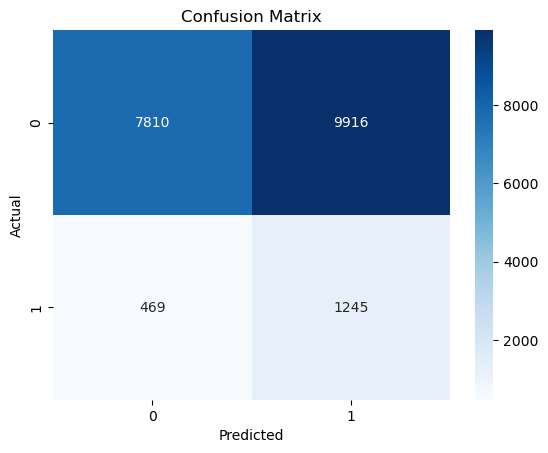

Binary
Epoch 1/25


/Users/suhaib/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.6833 - precision: 0.0923 - recall: 0.7813 - val_loss: 0.7521 - val_precision: 0.0880 - val_recall: 0.9406
Epoch 2/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.7565 - precision: 0.0954 - recall: 0.8932 - val_loss: 0.7301 - val_precision: 0.0904 - val_recall: 0.8855
Epoch 3/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.5075 - precision: 0.0933 - recall: 0.7670 - val_loss: 0.7724 - val_precision: 0.0894 - val_recall: 0.9170
Epoch 4/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.3895 - precision: 0.0921 - recall: 0.8589 - val_loss: 0.7458 - val_precision: 0.0907 - val_recall: 0.8759
Epoch 5/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.7171 - precision: 0.0960 - recall: 0.8801 - val_loss: 0.7131 - val_precision: 0.0916 - val_recall: 0.8558
Epoch 6/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.6885 - precision: 0.0958 - recall: 0.8620 - val_loss: 0.7210 - val_precision: 0.0949 - val_recall: 0.80

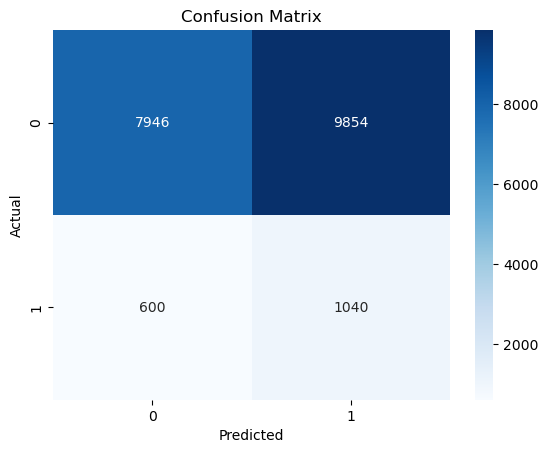

Categorical
Epoch 1/25


/Users/suhaib/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.4097 - precision: 0.0961 - recall: 0.7030 - val_loss: 0.7110 - val_precision: 0.0986 - val_recall: 0.7758
Epoch 2/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.1682 - precision: 0.1007 - recall: 0.7571 - val_loss: 0.7120 - val_precision: 0.0953 - val_recall: 0.8124
Epoch 3/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 10.2763 - precision: 0.1046 - recall: 0.7673 - val_loss: 0.7899 - val_precision: 0.0955 - val_recall: 0.8534
Epoch 4/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.2771 - precision: 0.0999 - recall: 0.7915 - val_loss: 0.7288 - val_precision: 0.0994 - val_recall: 0.7809
Epoch 5/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.1615 - precision: 0.1024 - recall: 0.7591 - val_loss: 0.7502 - val_precision: 0.0963 - val_recall: 0.8210
Epoch 6/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.1178 - precision: 0.1010 - recall: 0.7481 - val_loss: 0.7194 - val_precision: 0.0992 - val_recall: 0.78

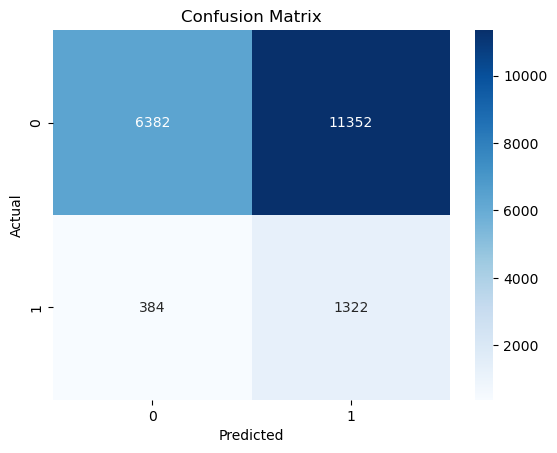

Numeric + Binary
Epoch 1/25


/Users/suhaib/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.5407 - precision: 0.1018 - recall: 0.6569 - val_loss: 0.6841 - val_precision: 0.1143 - val_recall: 0.6631
Epoch 2/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.3058 - precision: 0.1068 - recall: 0.7310 - val_loss: 0.6830 - val_precision: 0.1143 - val_recall: 0.6731
Epoch 3/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.0948 - precision: 0.1070 - recall: 0.7045 - val_loss: 0.6542 - val_precision: 0.1178 - val_recall: 0.6364
Epoch 4/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.2653 - precision: 0.1114 - recall: 0.7123 - val_loss: 0.8215 - val_precision: 0.0983 - val_recall: 0.8974
Epoch 5/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.1672 - precision: 0.1079 - recall: 0.7325 - val_loss: 0.6011 - val_precision: 0.1215 - val_recall: 0.5229
Epoch 6/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.4254 - precision: 0.1120 - recall: 0.7390 - val_loss: 0.6806 - val_precision: 0.1164 - val_recall: 0.65

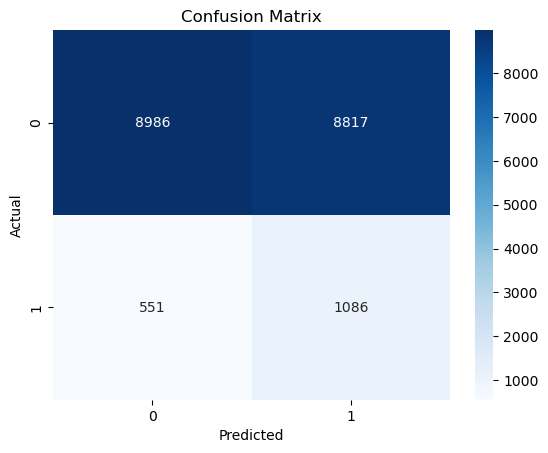

Numeric + Categorical
Epoch 1/25


/Users/suhaib/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.3841 - precision: 0.1059 - recall: 0.6563 - val_loss: 0.6697 - val_precision: 0.1240 - val_recall: 0.6166
Epoch 2/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.2856 - precision: 0.1154 - recall: 0.6974 - val_loss: 0.8080 - val_precision: 0.1071 - val_recall: 0.8415
Epoch 3/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.0480 - precision: 0.1117 - recall: 0.6784 - val_loss: 0.7002 - val_precision: 0.1174 - val_recall: 0.6515
Epoch 4/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.3055 - precision: 0.1165 - recall: 0.6991 - val_loss: 0.6940 - val_precision: 0.1205 - val_recall: 0.6639
Epoch 5/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.1093 - precision: 0.1193 - recall: 0.6828 - val_loss: 0.6192 - val_precision: 0.1250 - val_recall: 0.5593
Epoch 6/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.1799 - precision: 0.1259 - recall: 0.6705 - val_loss: 0.7627 - val_precision: 0.1103 - val_recall: 0.78

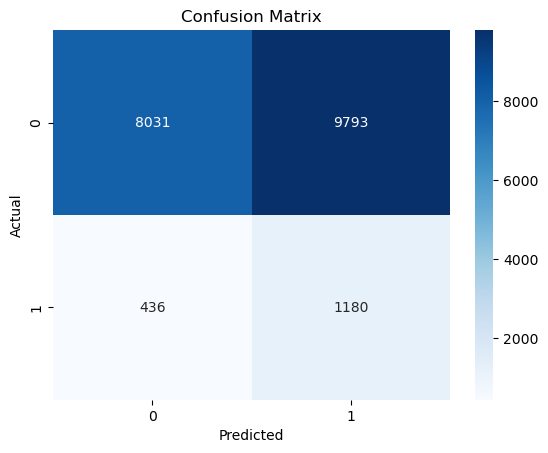

Binary + Categorical
Epoch 1/25


/Users/suhaib/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.6266 - precision: 0.1009 - recall: 0.7382 - val_loss: 0.7385 - val_precision: 0.1033 - val_recall: 0.8307
Epoch 2/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.3498 - precision: 0.1082 - recall: 0.7469 - val_loss: 0.7190 - val_precision: 0.1057 - val_recall: 0.7923
Epoch 3/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.2804 - precision: 0.1075 - recall: 0.7510 - val_loss: 0.6668 - val_precision: 0.1095 - val_recall: 0.7156
Epoch 4/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.1613 - precision: 0.1027 - recall: 0.7394 - val_loss: 0.7512 - val_precision: 0.0992 - val_recall: 0.8616
Epoch 5/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.3476 - precision: 0.1024 - recall: 0.7888 - val_loss: 0.7094 - val_precision: 0.1058 - val_recall: 0.7665
Epoch 6/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.3794 - precision: 0.1046 - recall: 0.7793 - val_loss: 0.7407 - val_precision: 0.1036 - val_recall: 0.79

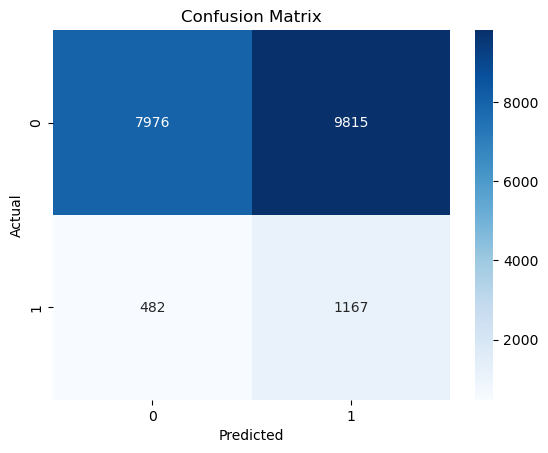

Numeric + Binary + Categorical
Epoch 1/25


/Users/suhaib/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.2948 - precision: 0.1043 - recall: 0.6629 - val_loss: 0.6350 - val_precision: 0.1144 - val_recall: 0.6059
Epoch 2/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.2915 - precision: 0.1169 - recall: 0.7358 - val_loss: 0.6788 - val_precision: 0.1183 - val_recall: 0.6641
Epoch 3/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.0956 - precision: 0.1175 - recall: 0.6868 - val_loss: 0.7056 - val_precision: 0.1138 - val_recall: 0.7153
Epoch 4/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.2593 - precision: 0.1183 - recall: 0.6755 - val_loss: 0.7265 - val_precision: 0.1086 - val_recall: 0.7569
Epoch 5/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.4433 - precision: 0.1176 - recall: 0.7349 - val_loss: 0.7689 - val_precision: 0.1095 - val_recall: 0.7439
Epoch 6/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.1145 - precision: 0.1181 - recall: 0.7008 - val_loss: 0.6993 - val_precision: 0.1169 - val_recall: 0.67

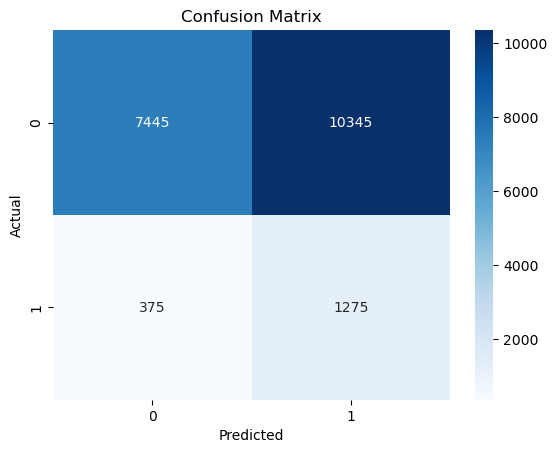

In [5]:
for df_name, df in df_dict.items():
    print(df_name)
    X_data = df.loc[:,[col for col in df.columns if col != 'Default']].values
    y_data = df.loc[:, 'Default'].values.astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size=0.3)
    
    binary_nn = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    binary_nn.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='binary_crossentropy',
        metrics=['precision', 'recall']
    )
    history = binary_nn.fit(
        X_train, y_train,
        epochs=25,
        batch_size=32,
        validation_split=0.3,
        class_weight={0: int(y_data.mean() * 100), 1: int((1-y_data.mean()) * 100)}
    )
    
    y_pred_proba = binary_nn.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

#### Different Datasets Reflection


Moving forward, we will continue to use only the 'Numeric + Binary + Categorical' dataset since this includes all of the selected data and has one of the better f1-scores.

#### Optimal Neural Network Model (so far)

We will build our optimal logistic regression model using:
- Dataset: Full (Numeric + Binary + Categorical)
- layers = {16, 8, 1}
- epochs = 25

Numeric + Binary + Categorical
Epoch 1/25


/Users/suhaib/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.3468 - precision: 0.0994 - recall: 0.6470 - val_loss: 0.7735 - val_precision: 0.1124 - val_recall: 0.7406
Epoch 2/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.1818 - precision: 0.1154 - recall: 0.7233 - val_loss: 0.6729 - val_precision: 0.1223 - val_recall: 0.6000
Epoch 3/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.0399 - precision: 0.1179 - recall: 0.6605 - val_loss: 0.6922 - val_precision: 0.1184 - val_recall: 0.6937
Epoch 4/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.0157 - precision: 0.1199 - recall: 0.6391 - val_loss: 0.6926 - val_precision: 0.1193 - val_recall: 0.6921
Epoch 5/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.1798 - precision: 0.1188 - recall: 0.7019 - val_loss: 0.6170 - val_precision: 0.1301 - val_recall: 0.4870
Epoch 6/25
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.1988 - precision: 0.1227 - recall: 0.6821 - val_loss: 0.6706 - val_precision: 0.1166 - val_recall: 0.68

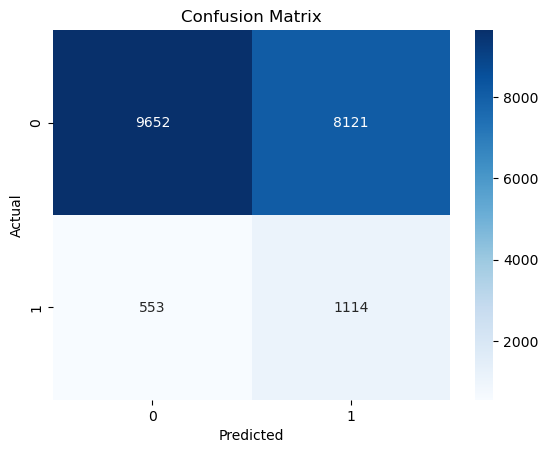

/var/folders/w5/srvyynsx0xl0xdcy3blxc3800000gp/T/ipykernel_5179/3952667661.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


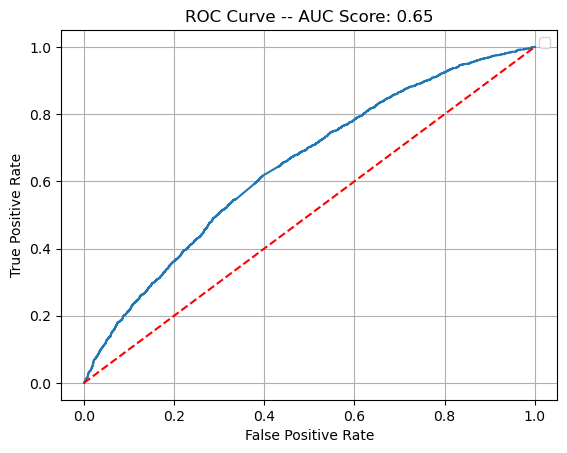

/var/folders/w5/srvyynsx0xl0xdcy3blxc3800000gp/T/ipykernel_5179/3952667661.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.linspace(0, 1, 10000), [y_test.mean()] * 10000, 'k--', color='red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


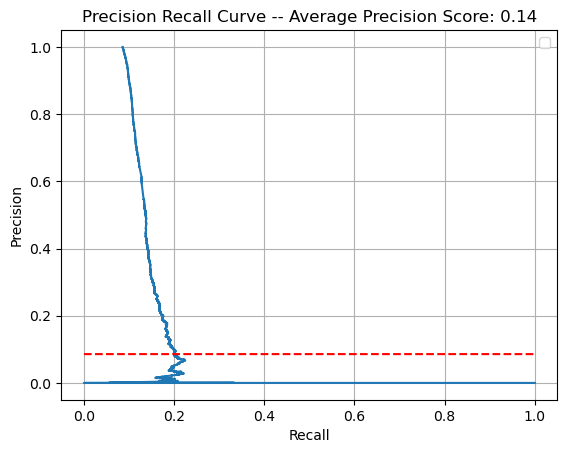

In [7]:
df_dict = {'Numeric + Binary + Categorical': df_auto_loan_numeric_binary_categorical_norm}

for df_name, df in df_dict.items():
    print(df_name)
    X_data = df.loc[:,[col for col in df.columns if col != 'Default']].values
    y_data = df.loc[:, 'Default'].values.astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size=0.3)
    
    binary_nn = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    binary_nn.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='binary_crossentropy',
        metrics=['precision', 'recall']
    )
    history = binary_nn.fit(
        X_train, y_train,
        epochs=25,
        batch_size=32,
        validation_split=0.3,
        class_weight={0: int(y_data.mean() * 100), 1: int((1-y_data.mean()) * 100)}
    )
    
    y_pred_proba = binary_nn.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    print(classification_report(y_test, y_pred))
    
    #Optimal Model Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    #Optimal Model ROC Curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba.reshape(-1,))
    auc_score = roc_auc_score(y_test, y_pred_proba.reshape(-1,))
    plt.figure()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], [0, 1], 'k--', color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve -- AUC Score: {round(auc_score, 2)}')
    plt.grid(True)
    plt.legend()
    plt.show()


    #Optimal Model Precision Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba.reshape(-1,))
    ap_score = average_precision_score(y_test, y_pred_proba.reshape(-1,))
    plt.figure()
    plt.plot(precision, recall)
    plt.plot(np.linspace(0, 1, 10000), [y_test.mean()] * 10000, 'k--', color='red')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision Recall Curve -- Average Precision Score: {round(ap_score, 2)}')
    plt.grid(True)
    plt.legend()
    plt.show()

### Reflection

While our ROC curve shows some signs of promise, our imbalanced dataset (90% (default=0), 10% (default=1)) may be the cause for this. Our low f1-score and erratic precision-recall curve shows that we should consider additional models.